# Predicting Heart Disease using Decision Trees and Neural Networks

# Reading the data

In [1]:
#Reading the data files
list.files(path = "../input")
df<-read.csv('../input/heart-disease-uci/heart.csv')
summary(df)


[1] "heart-disease-uci"

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

# Converting Categorical Variables

In [2]:
#Converting Categorical using as factor
for(i in c(2,3,6,9,14))
{
    df[,i]<-as.factor(df[,i])
}
summary(df)

      age        sex     cp         trestbps          chol       fbs    
 Min.   :29.00   0: 96   0:143   Min.   : 94.0   Min.   :126.0   0:258  
 1st Qu.:47.50   1:207   1: 50   1st Qu.:120.0   1st Qu.:211.0   1: 45  
 Median :55.00           2: 87   Median :130.0   Median :240.0          
 Mean   :54.37           3: 23   Mean   :131.6   Mean   :246.3          
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:274.5          
 Max.   :77.00                   Max.   :200.0   Max.   :564.0          
    restecg          thalach      exang      oldpeak         slope      
 Min.   :0.0000   Min.   : 71.0   0:204   Min.   :0.00   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:133.5   1: 99   1st Qu.:0.00   1st Qu.:1.000  
 Median :1.0000   Median :153.0           Median :0.80   Median :1.000  
 Mean   :0.5281   Mean   :149.6           Mean   :1.04   Mean   :1.399  
 3rd Qu.:1.0000   3rd Qu.:166.0           3rd Qu.:1.60   3rd Qu.:2.000  
 Max.   :2.0000   Max.   :202.0           Max.   :6

# Data Visualisation

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



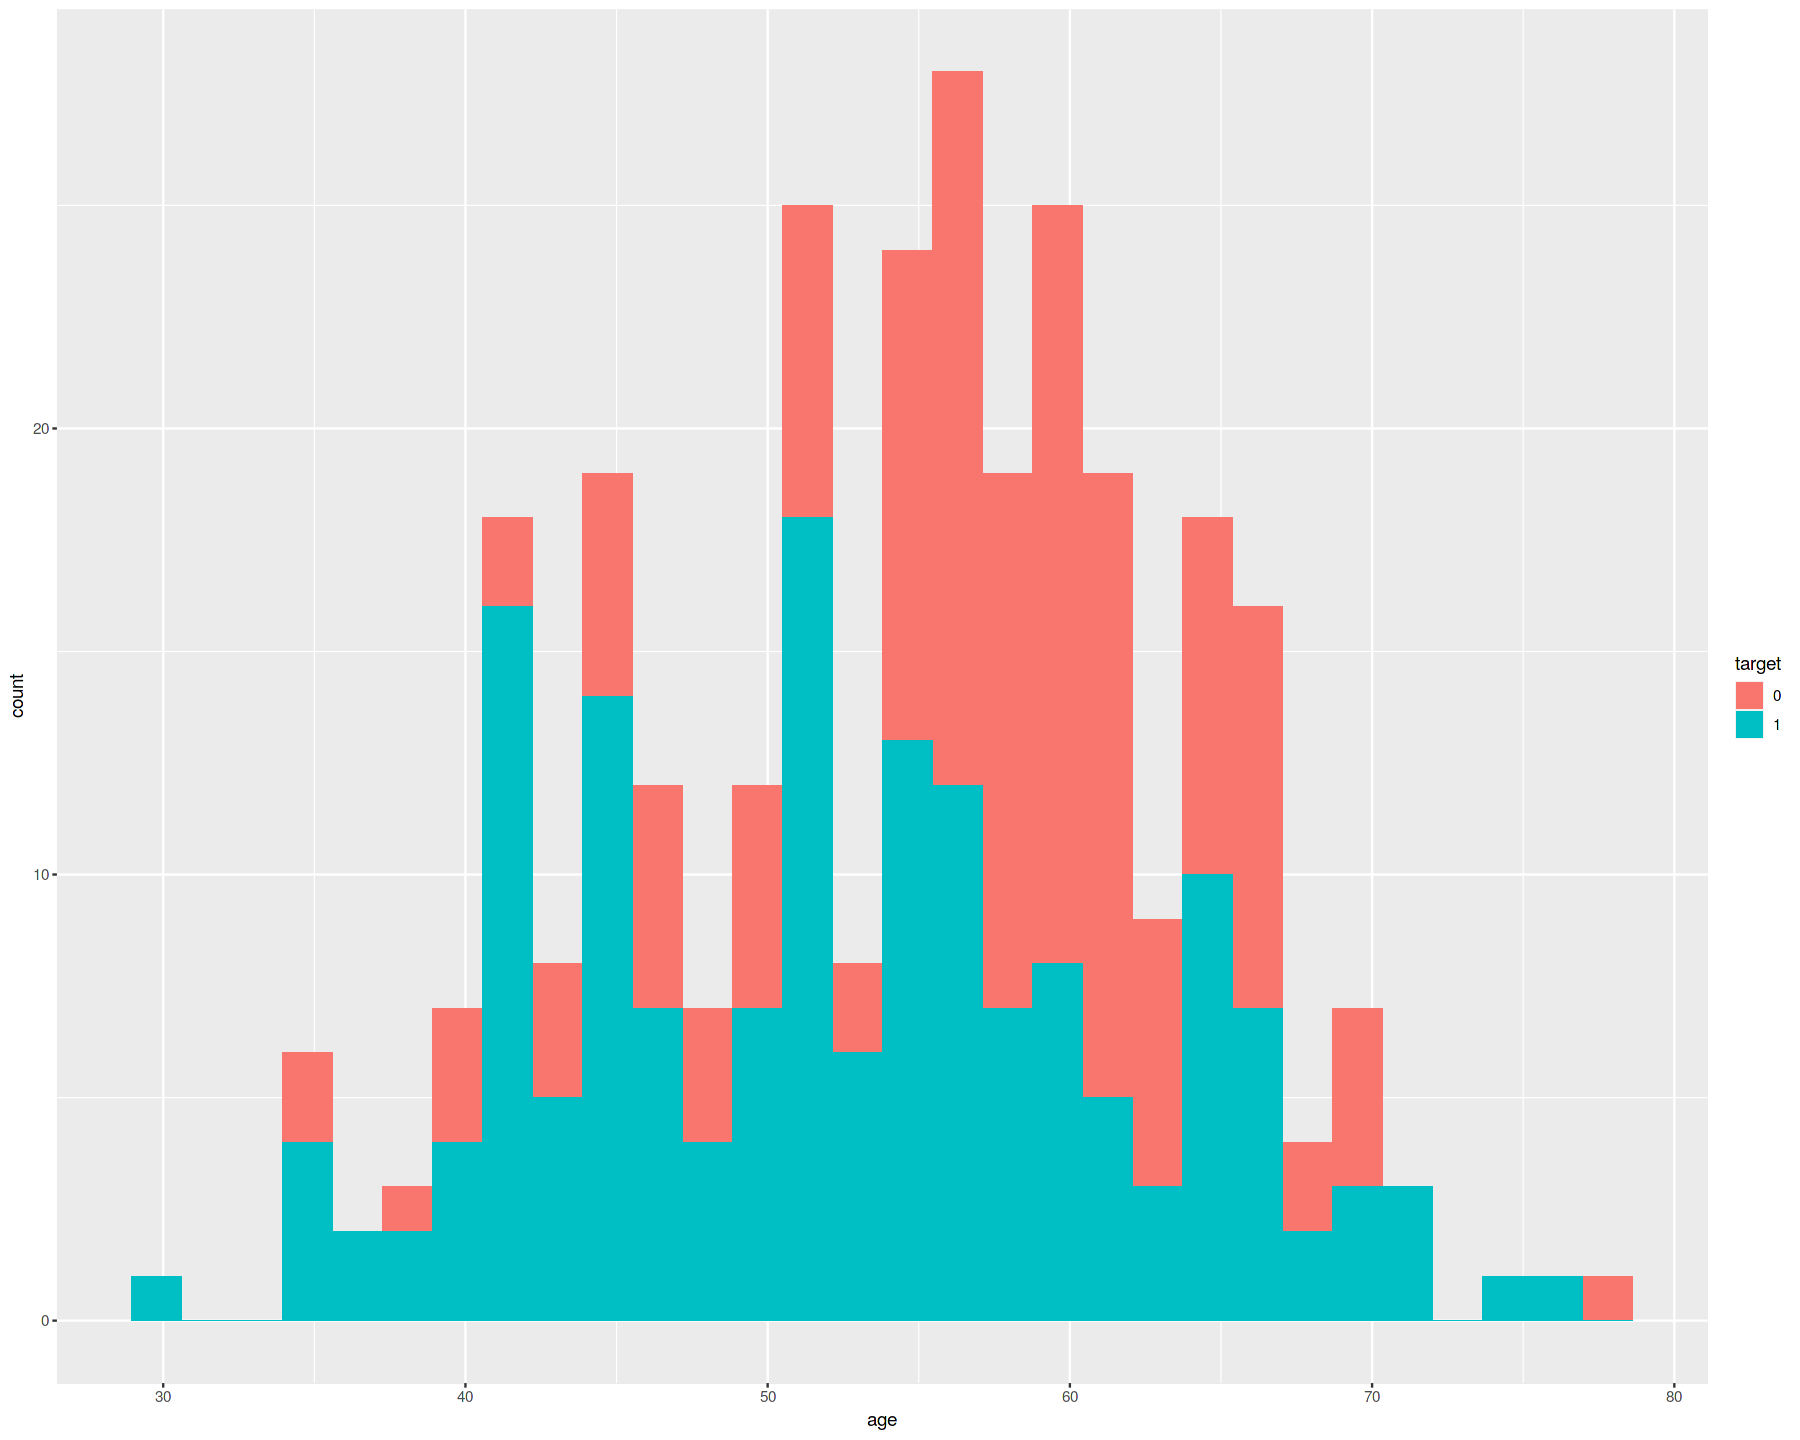

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



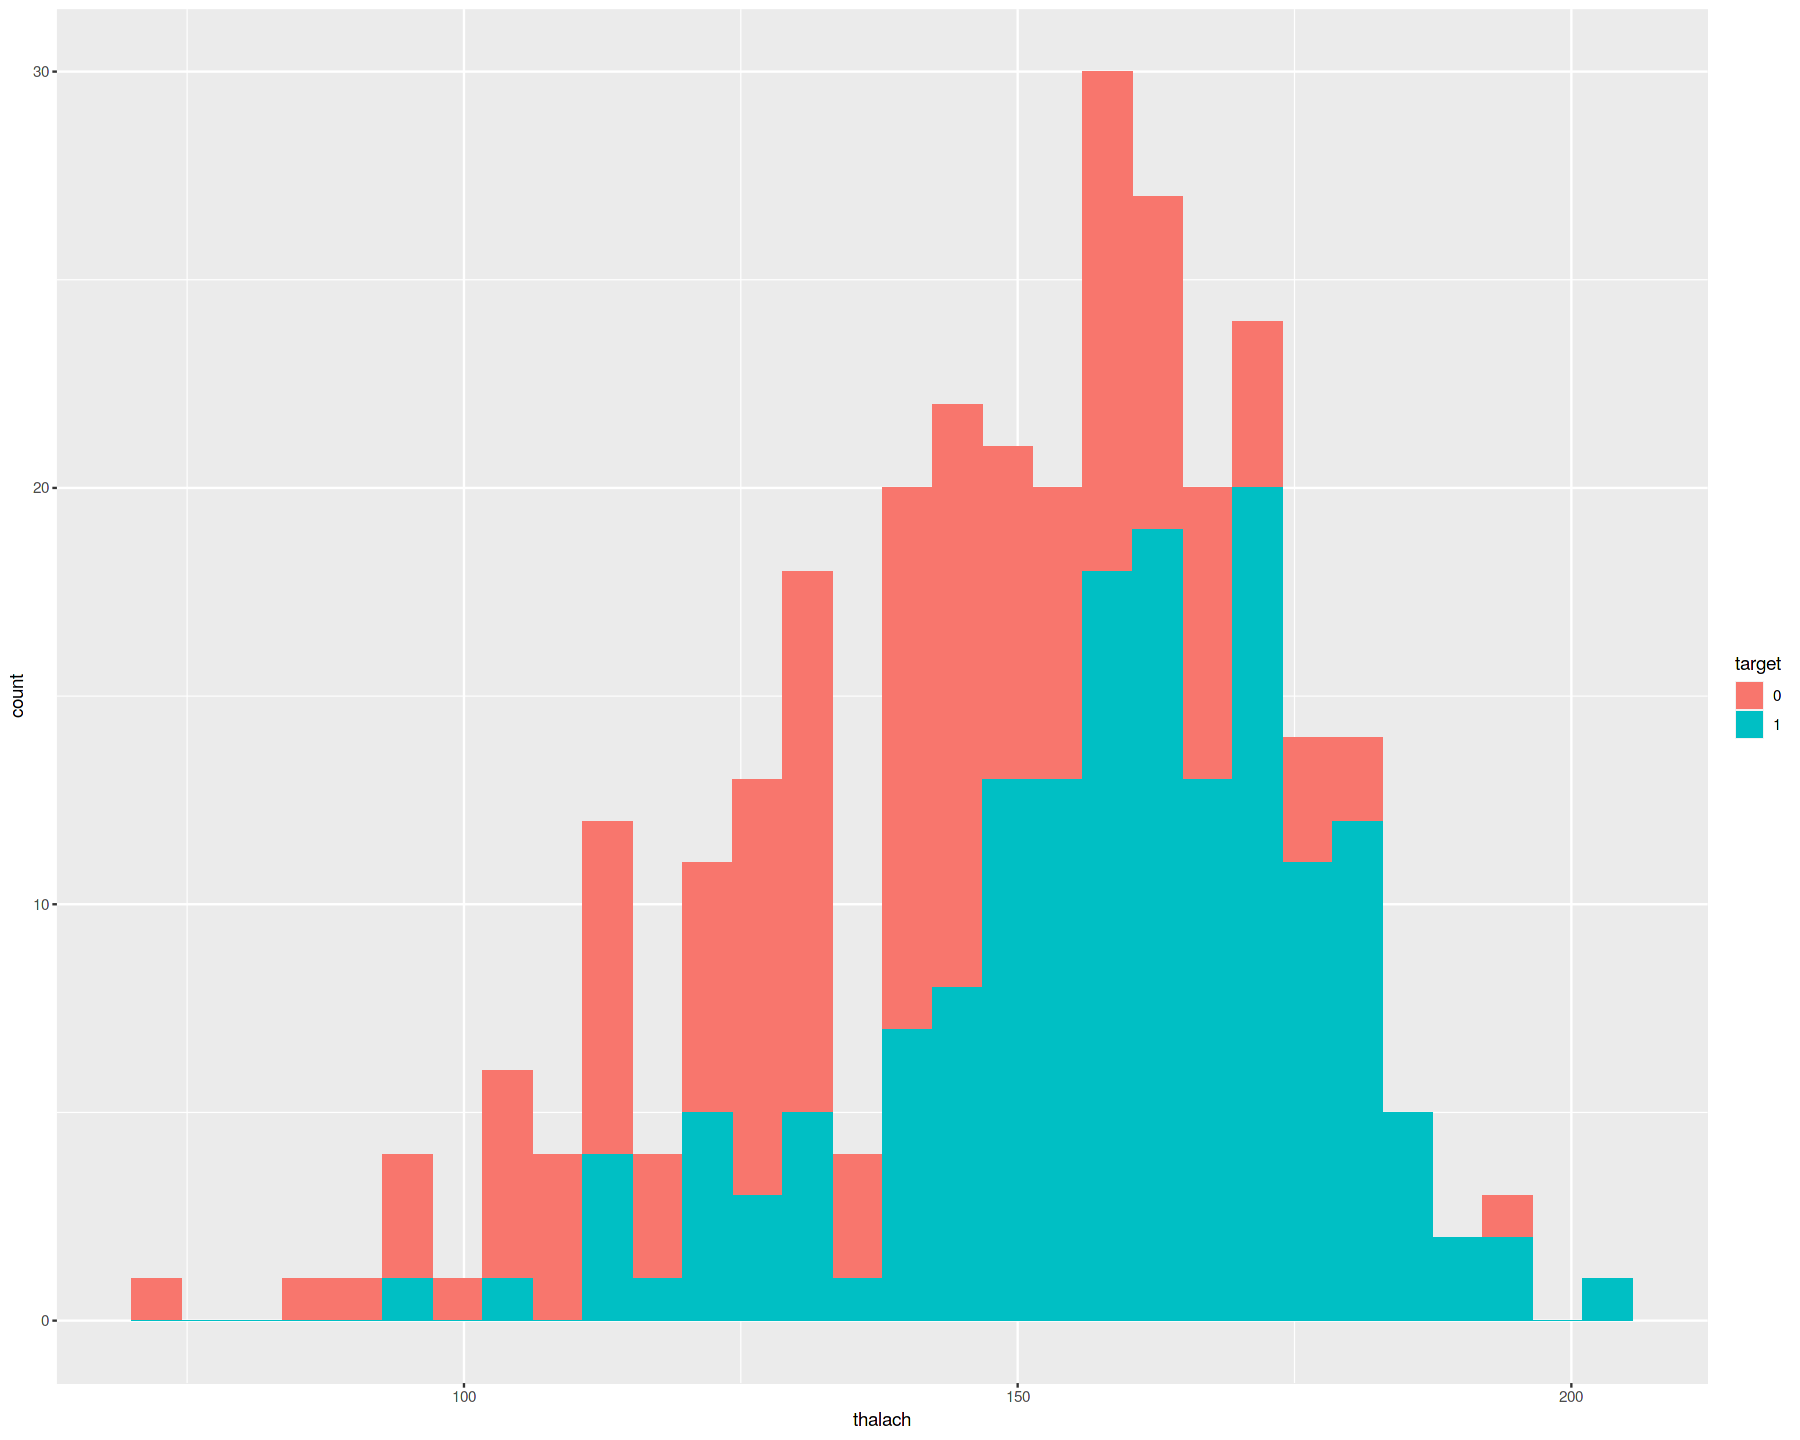

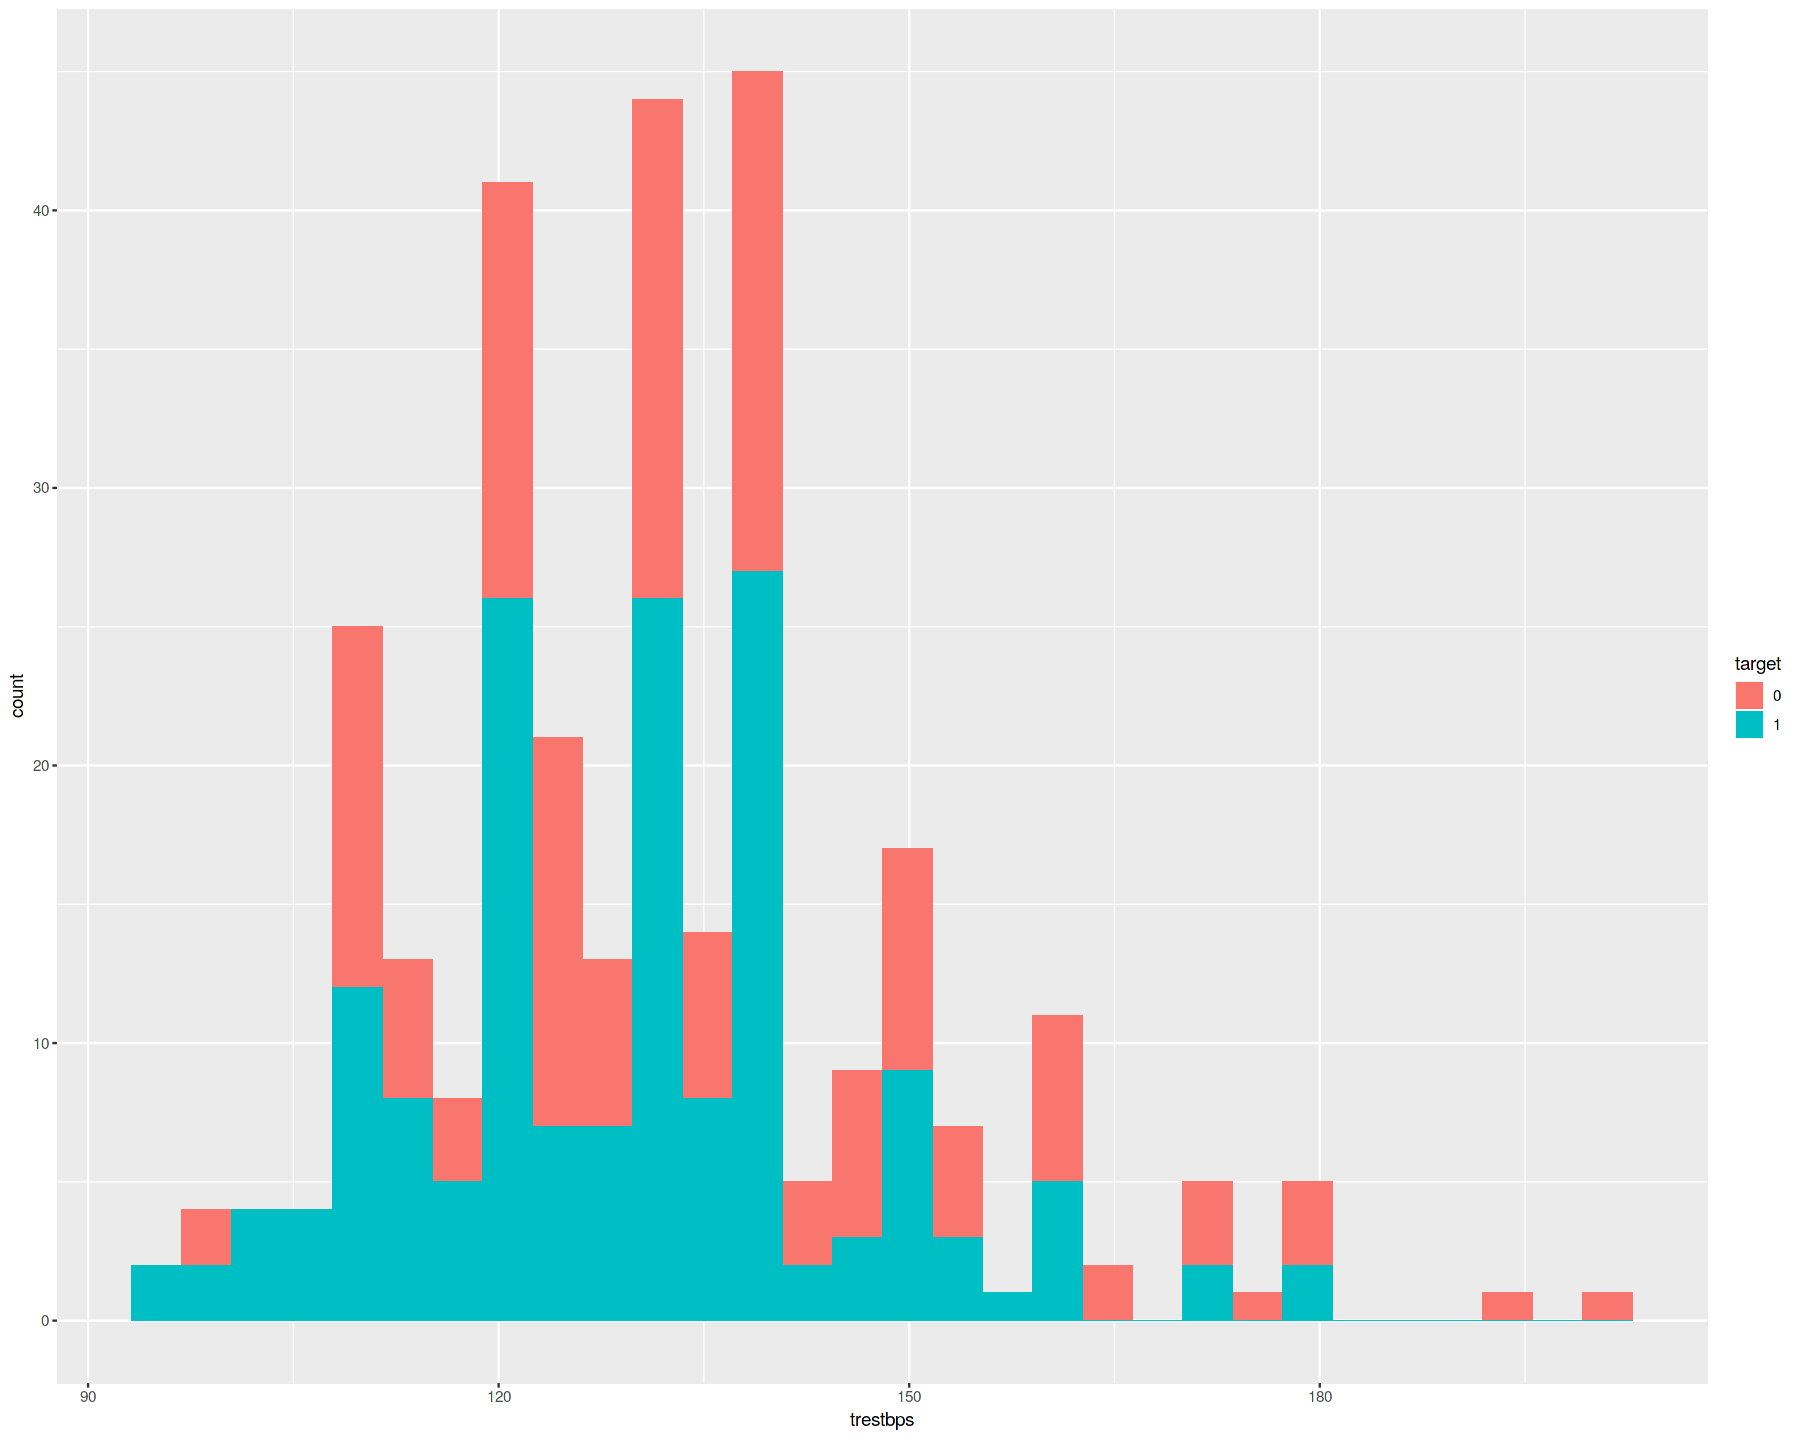

In [3]:
#Data Visualisation: Univariate and Bivariate analysis
x<-colnames(df)#saving column names in a variables 'x'

#plotting histograms
library(ggplot2)
options(repr.plot.width = 15, repr.plot.height = 12)
ggplot(df,aes(x = age , fill = target))+geom_histogram() # age distribution with respect to disease fatalities
ggplot(df,aes(x = thalach , fill = target))+geom_histogram() #maximum heart rate distribution
ggplot(df,aes(x = trestbps , fill = target))+geom_histogram() #resting blood pressure distribution


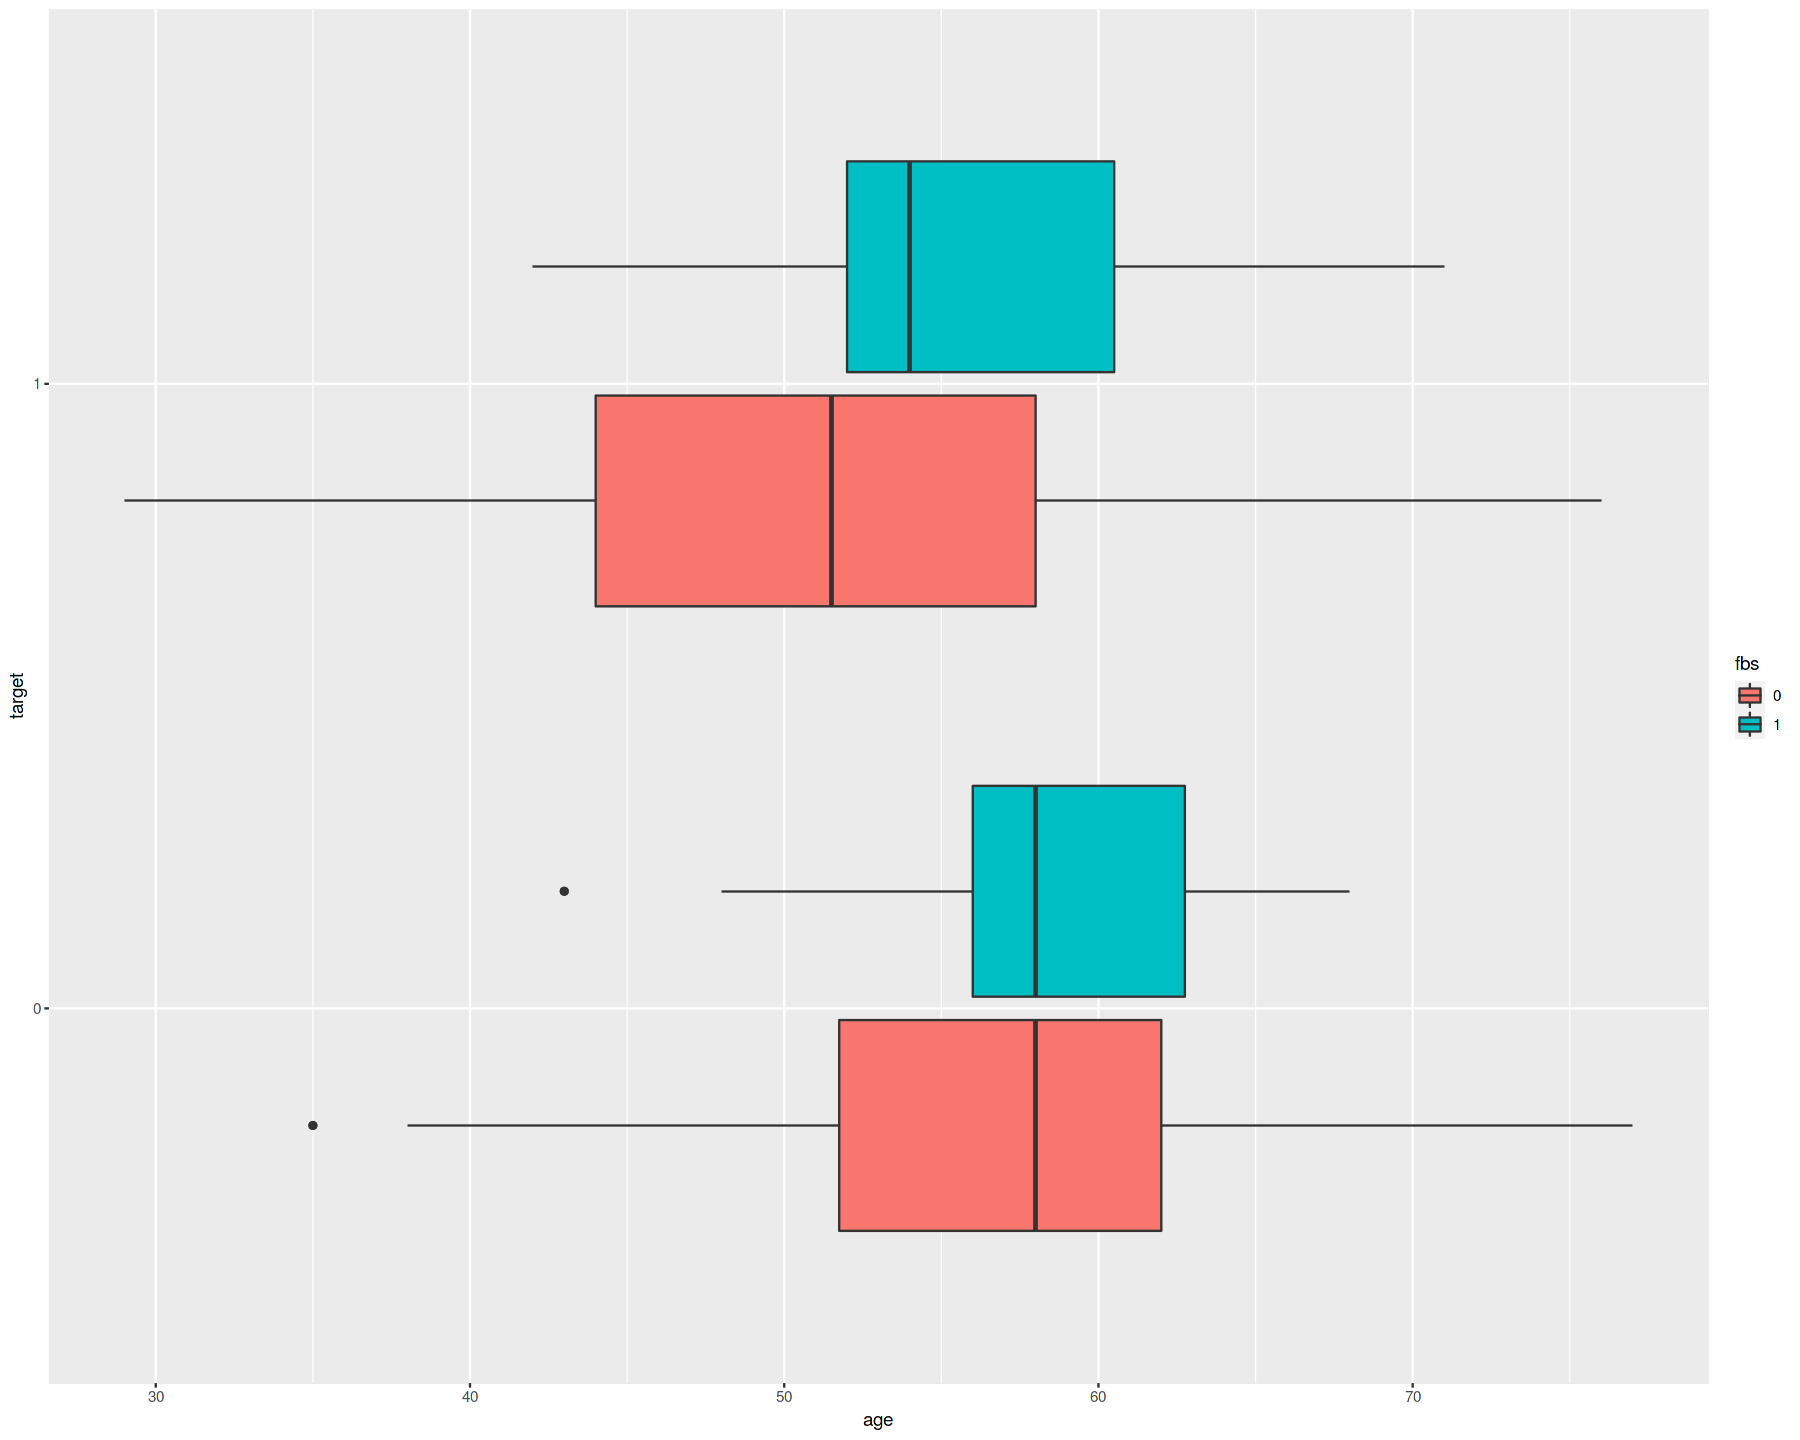

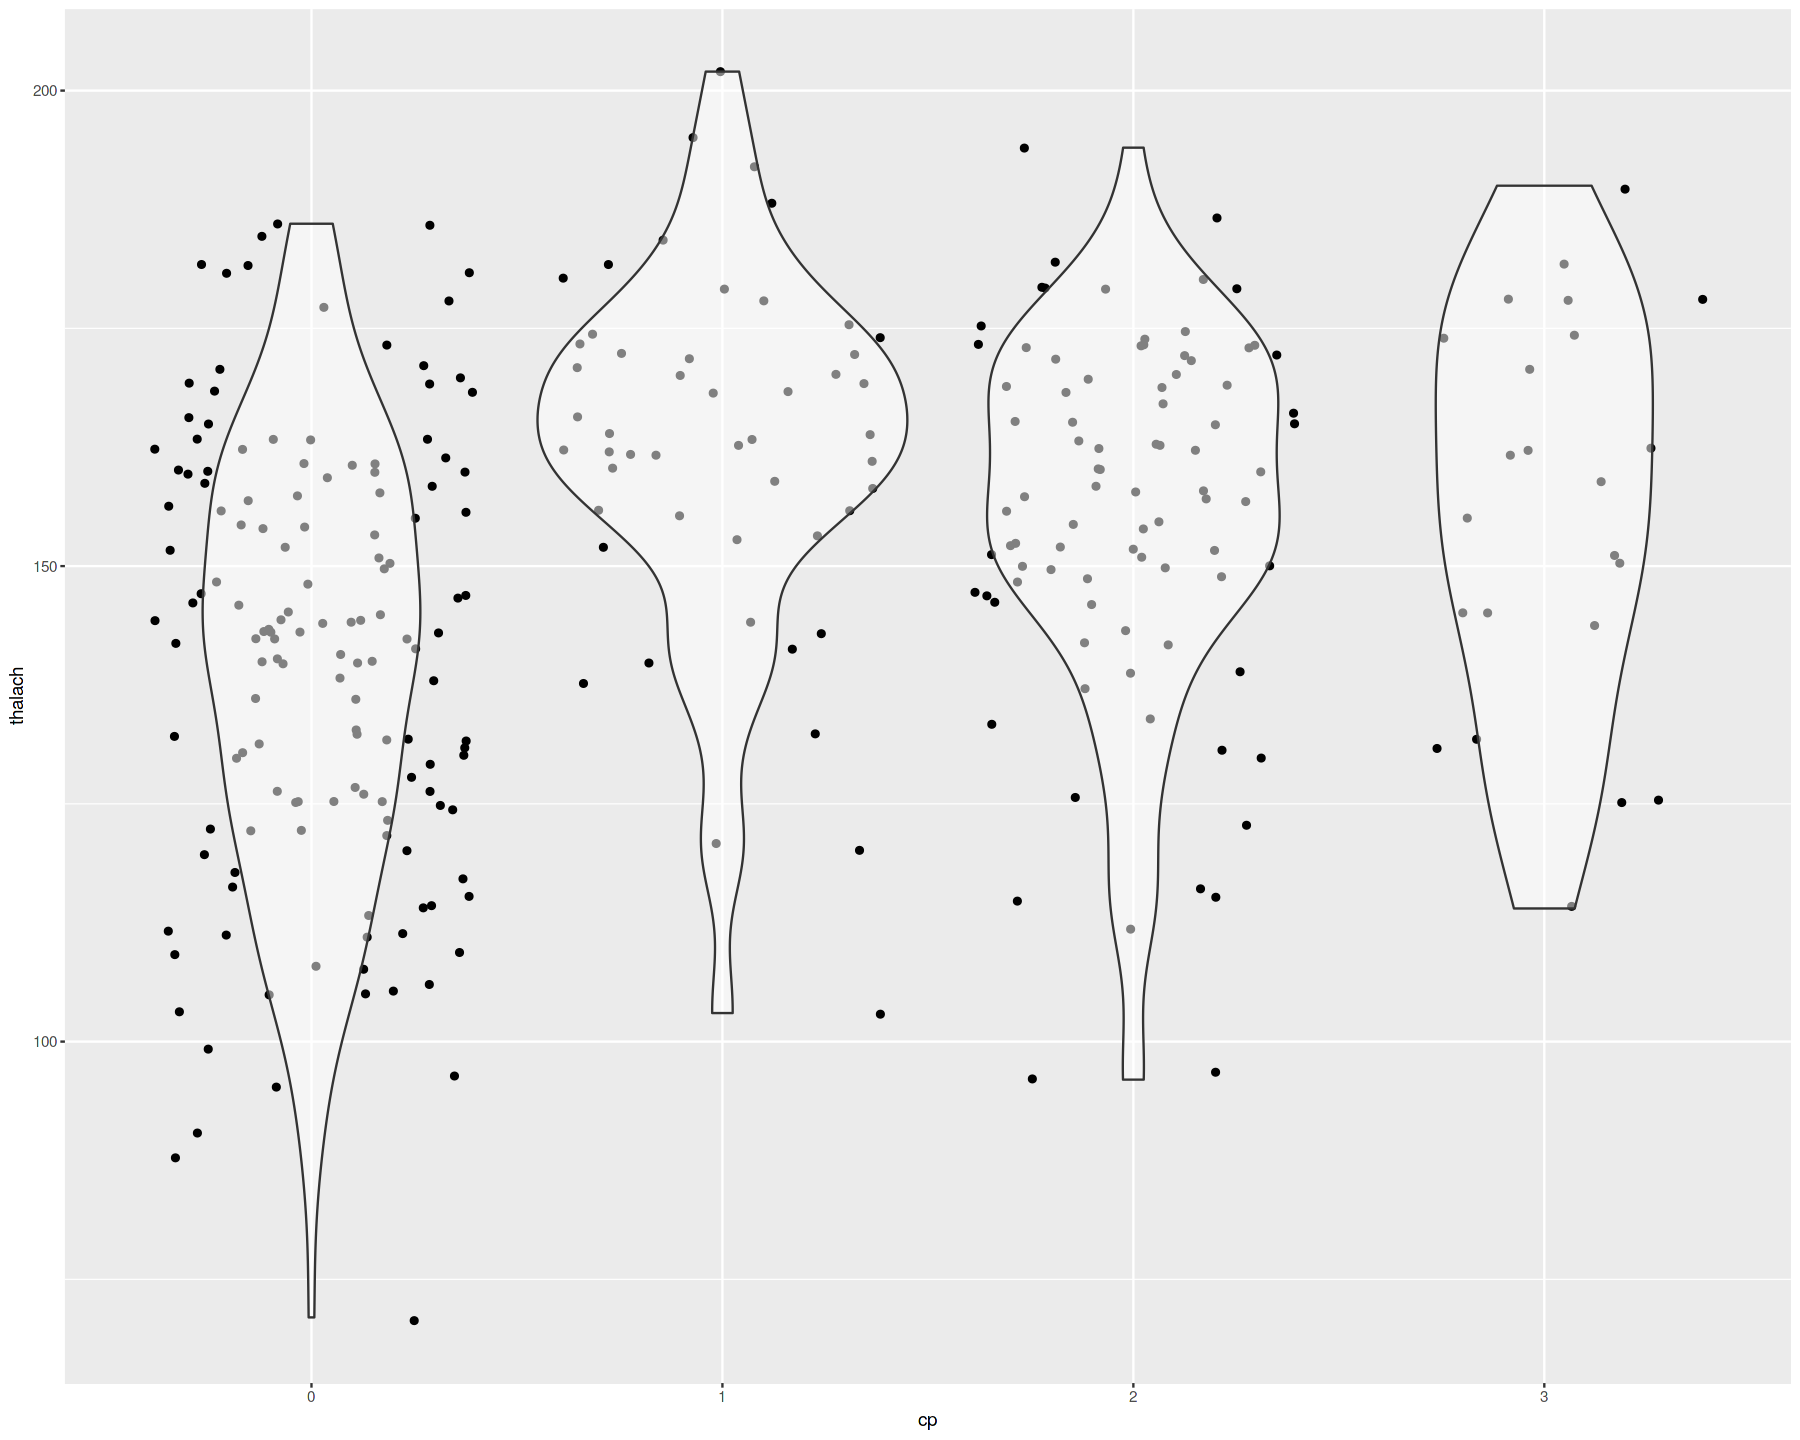

In [4]:
#plotting categorical variables
options(repr.plot.width = 15, repr.plot.height = 12)
ggplot(df,aes(x = age ,y= target , fill = fbs))+geom_boxplot() #box and whiskers visualisation of age w.r.t fatalities and fasting blood sugar levels(fbs)
ggplot(df,aes(y = thalach , x = cp ))+geom_jitter()+geom_violin(alpha=0.5) #jitter violin visualisation of maximum heart rate w.r.t chest pain level



`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



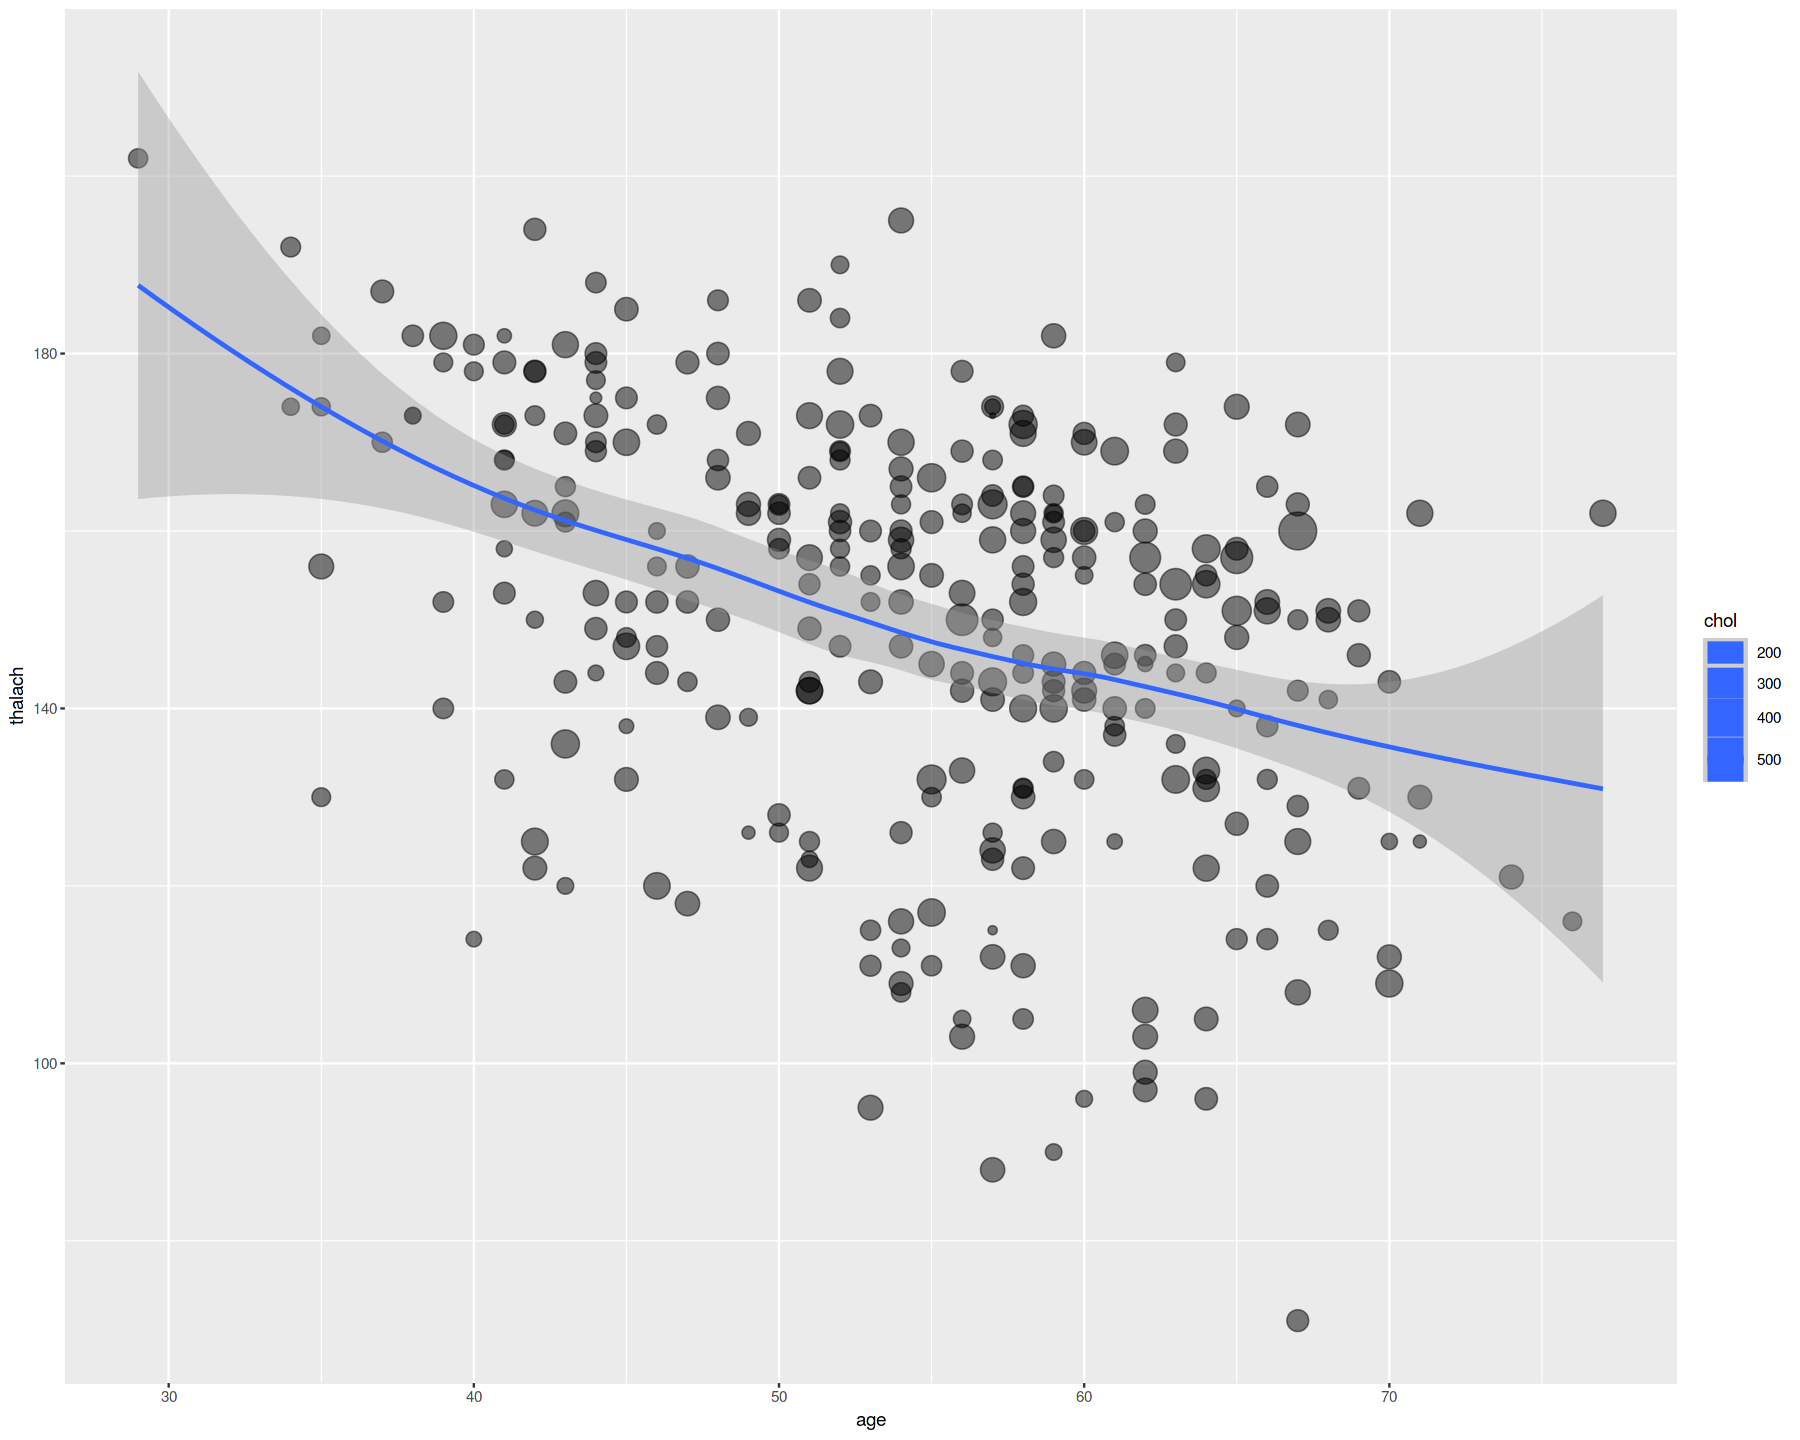

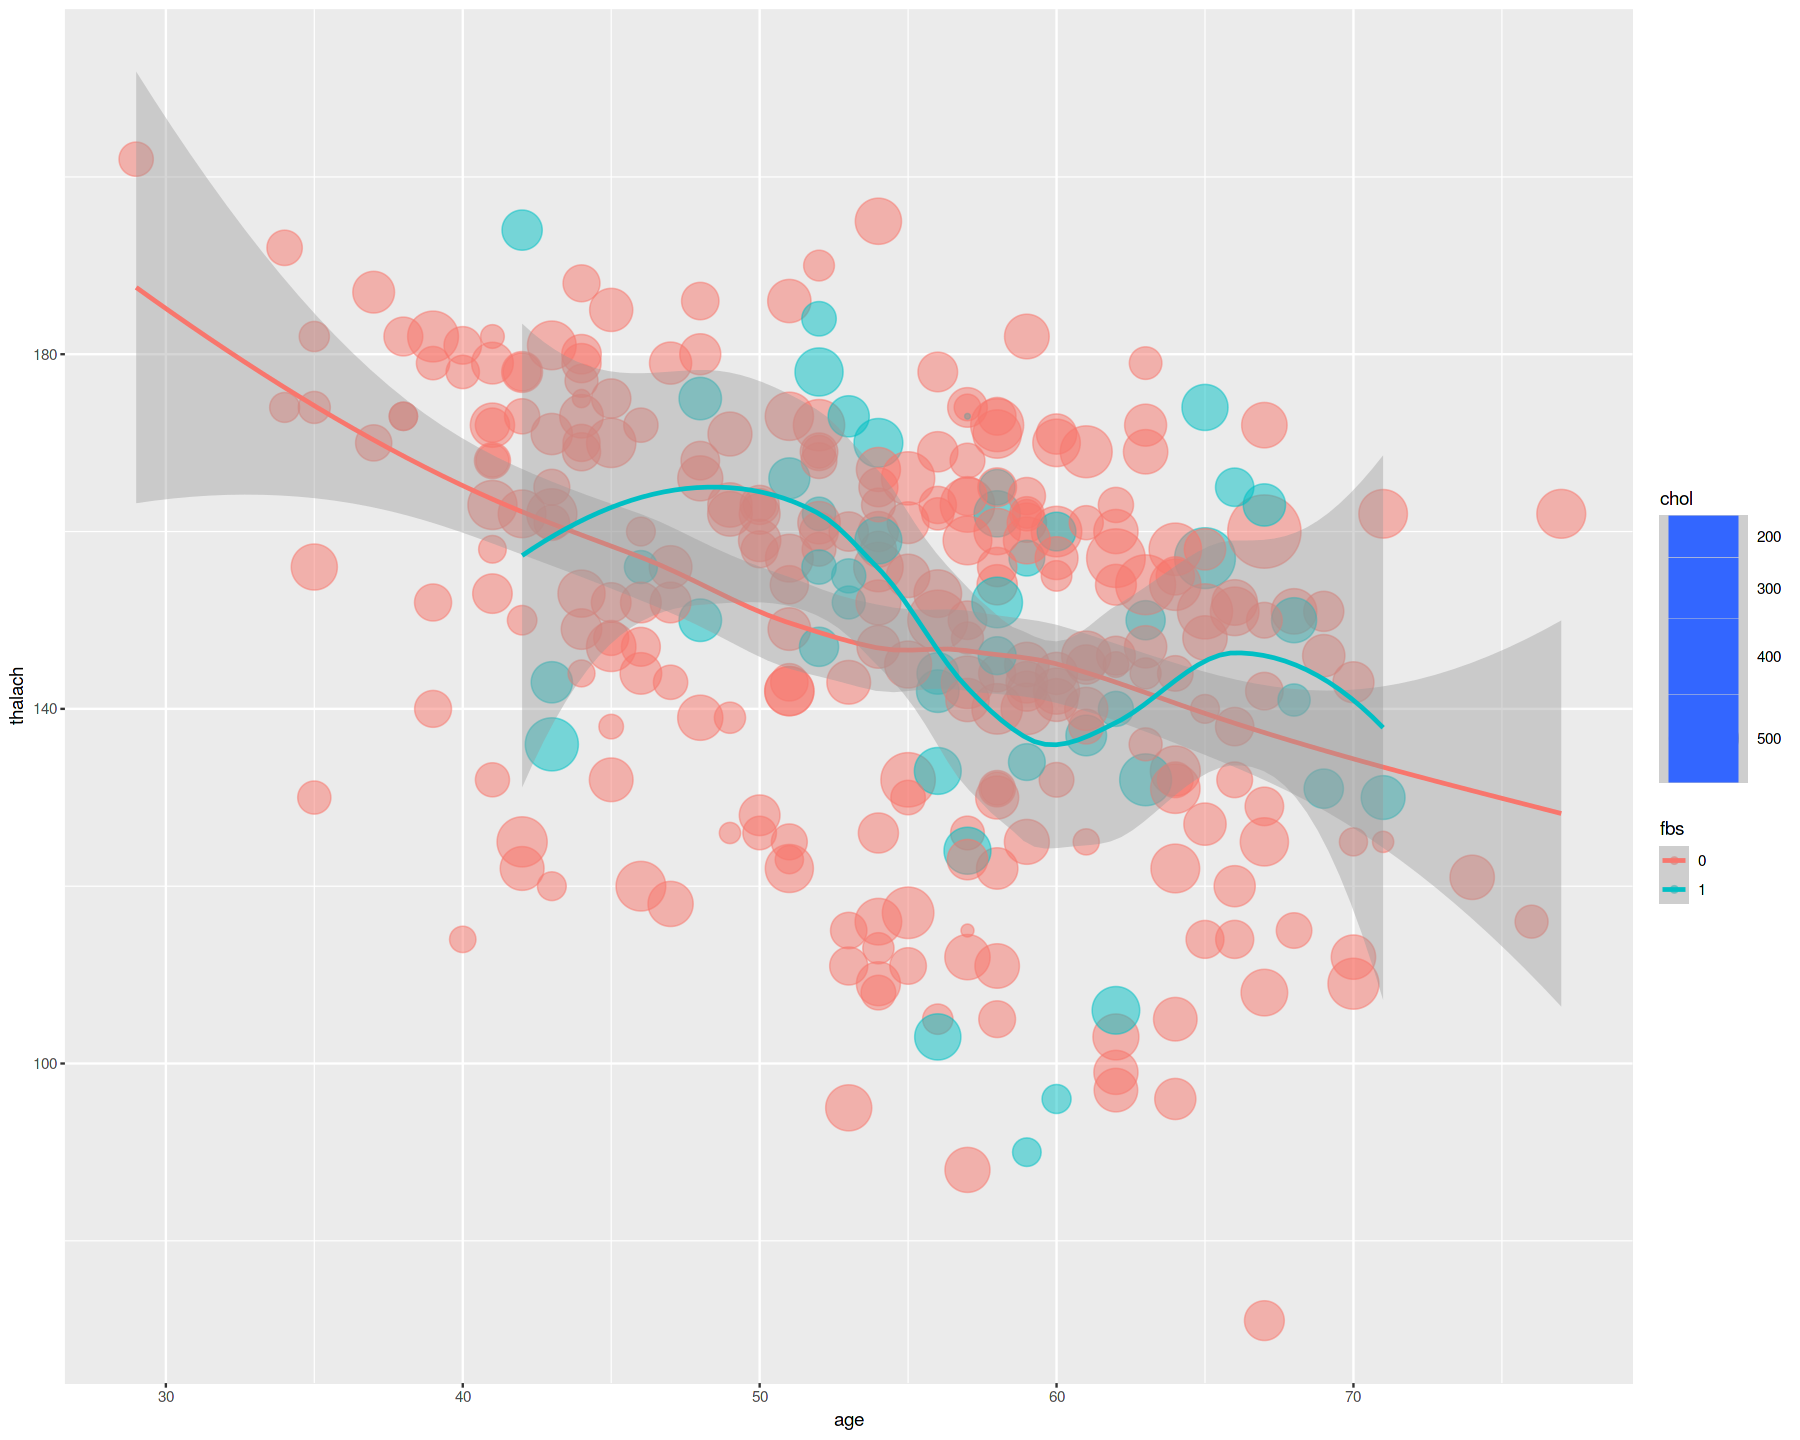

In [5]:
#scatter plots and bubble charts
options(repr.plot.width = 15, repr.plot.height = 12)
ggplot(df,aes(x = age ,y= thalach , size = chol))+scale_size(range = c(1,10))+geom_point(alpha = 0.5)+geom_smooth() #bubble plot to describe the relationship between age, maximum hear rate and cholesterol
ggplot(df,aes(x = age ,y= thalach , size = chol, color = fbs))+scale_size(range = c(1,20))+geom_point(alpha = 0.5)+geom_smooth()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pic

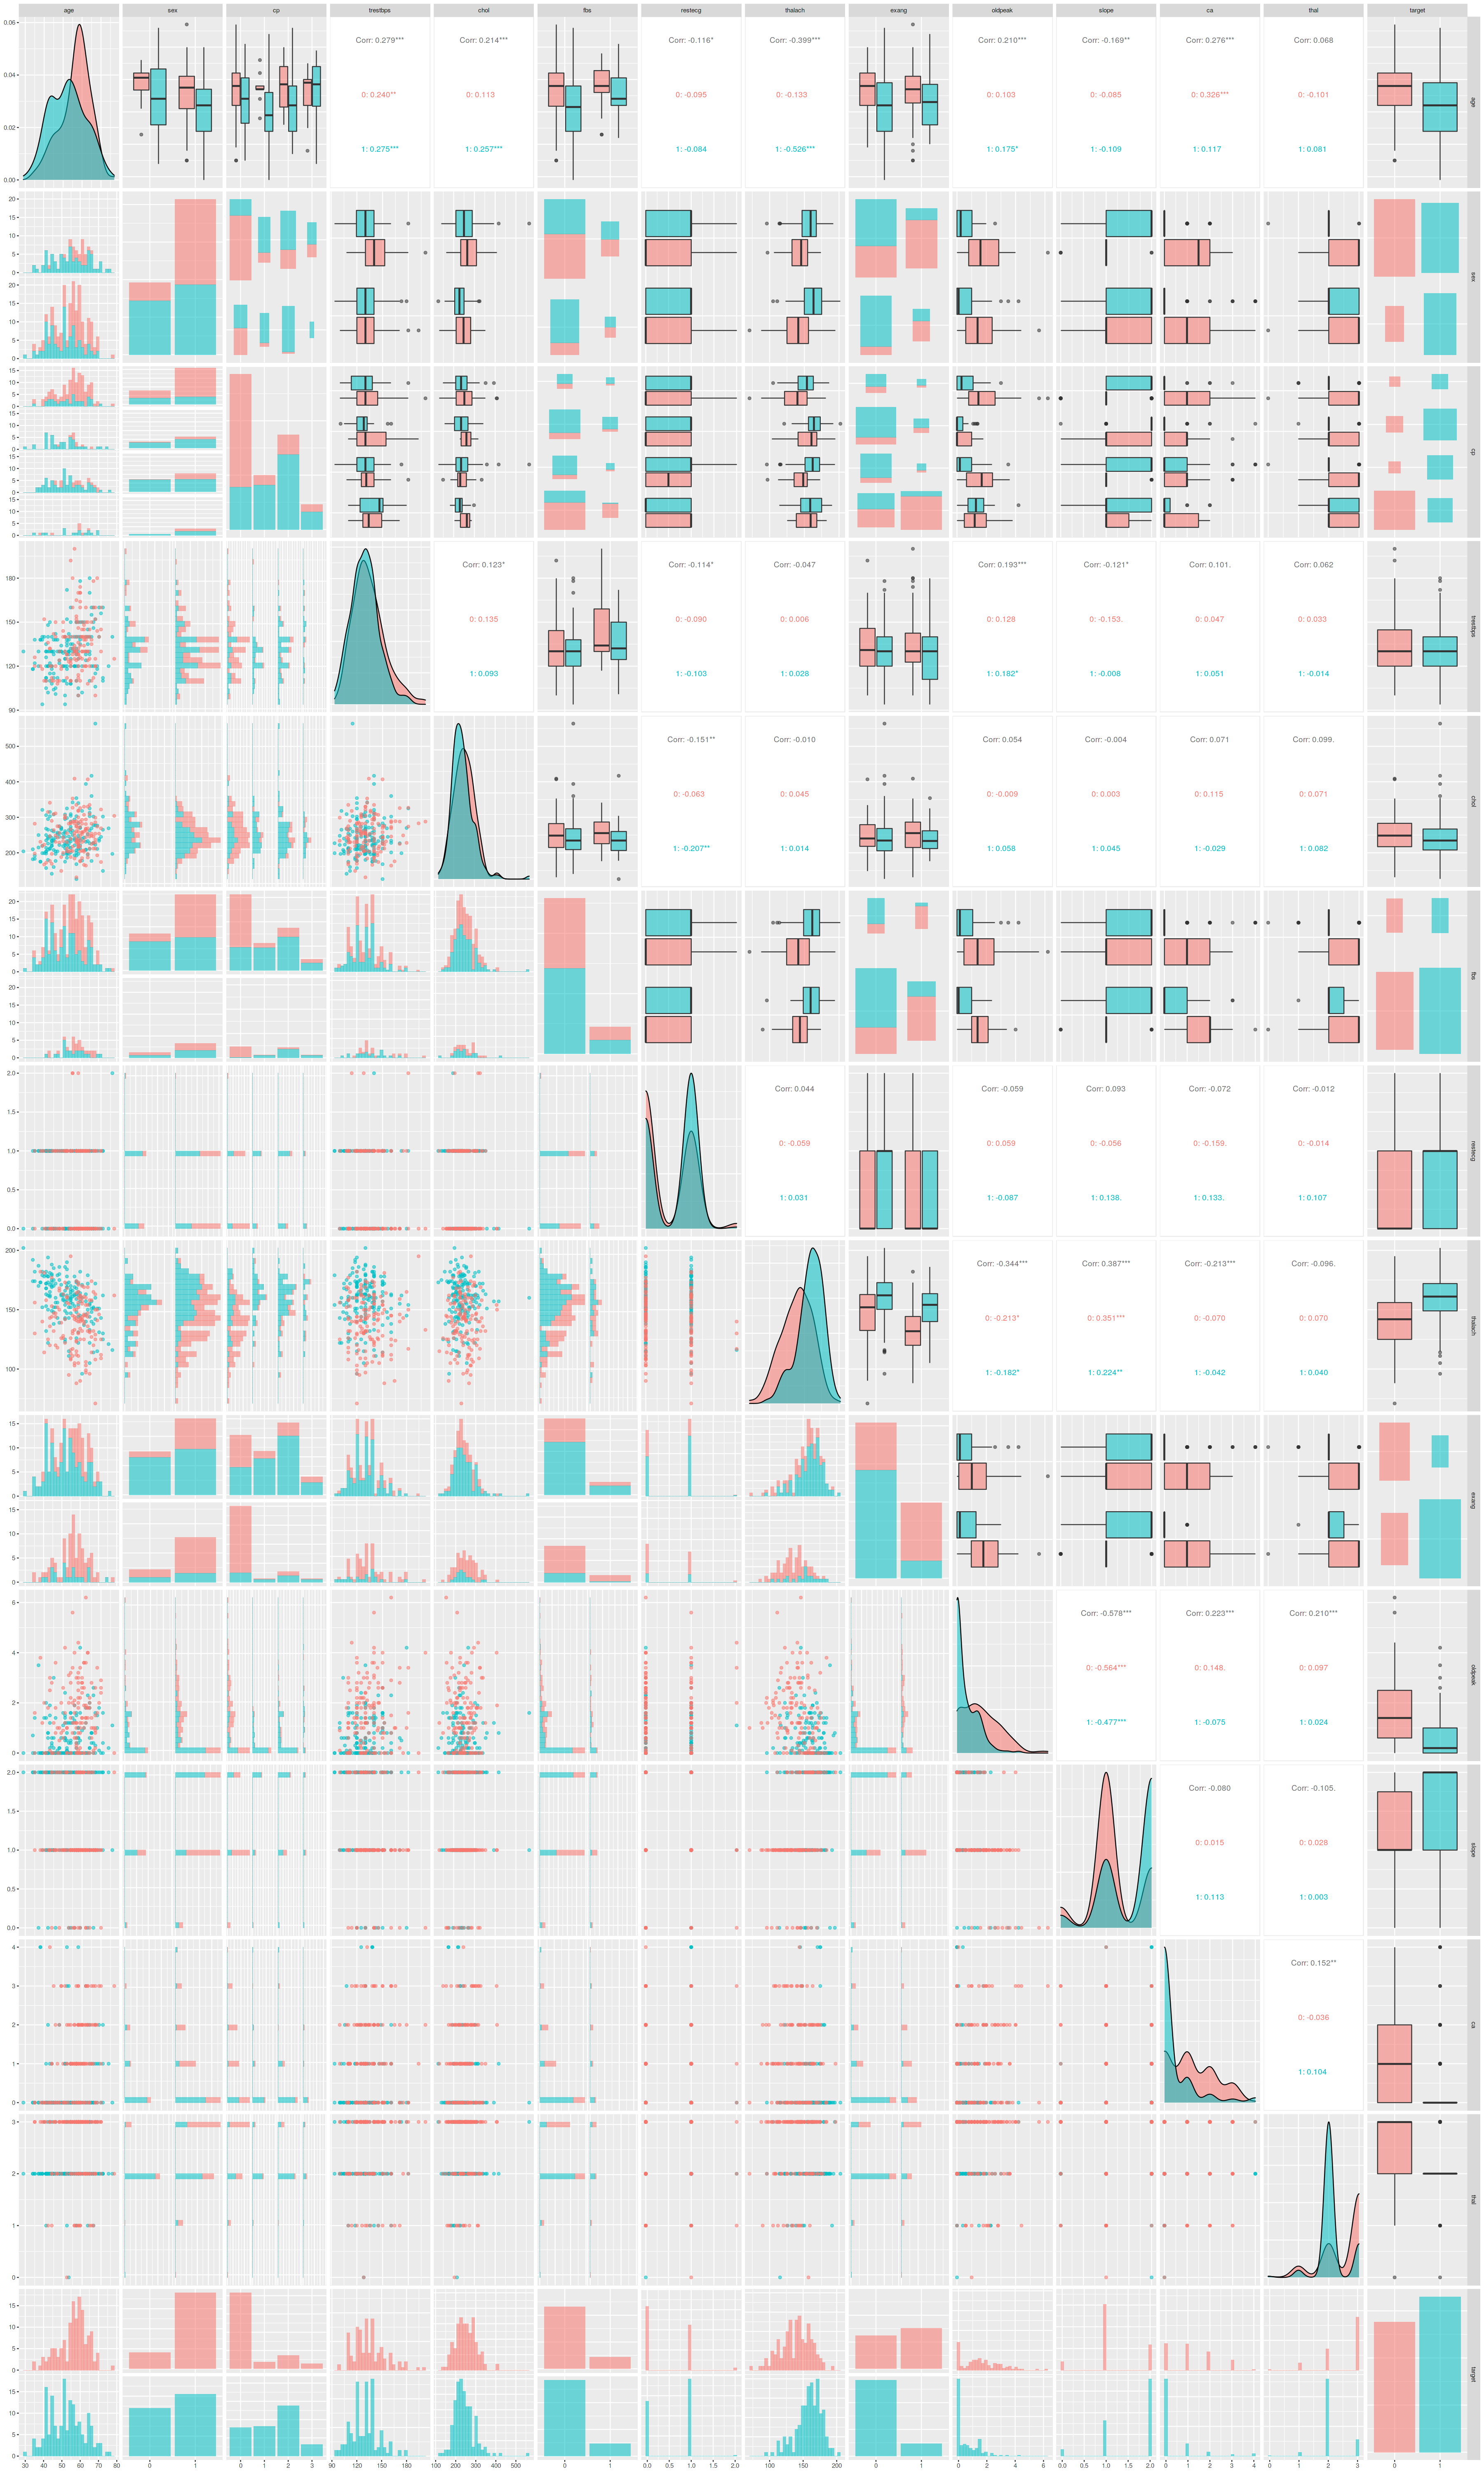

In [6]:
#pairsplot
options(repr.plot.width = 30, repr.plot.height = 50)
library(GGally)
ggpairs(df, aes(colour = target, alpha = 0.5))

corrplot 0.84 loaded



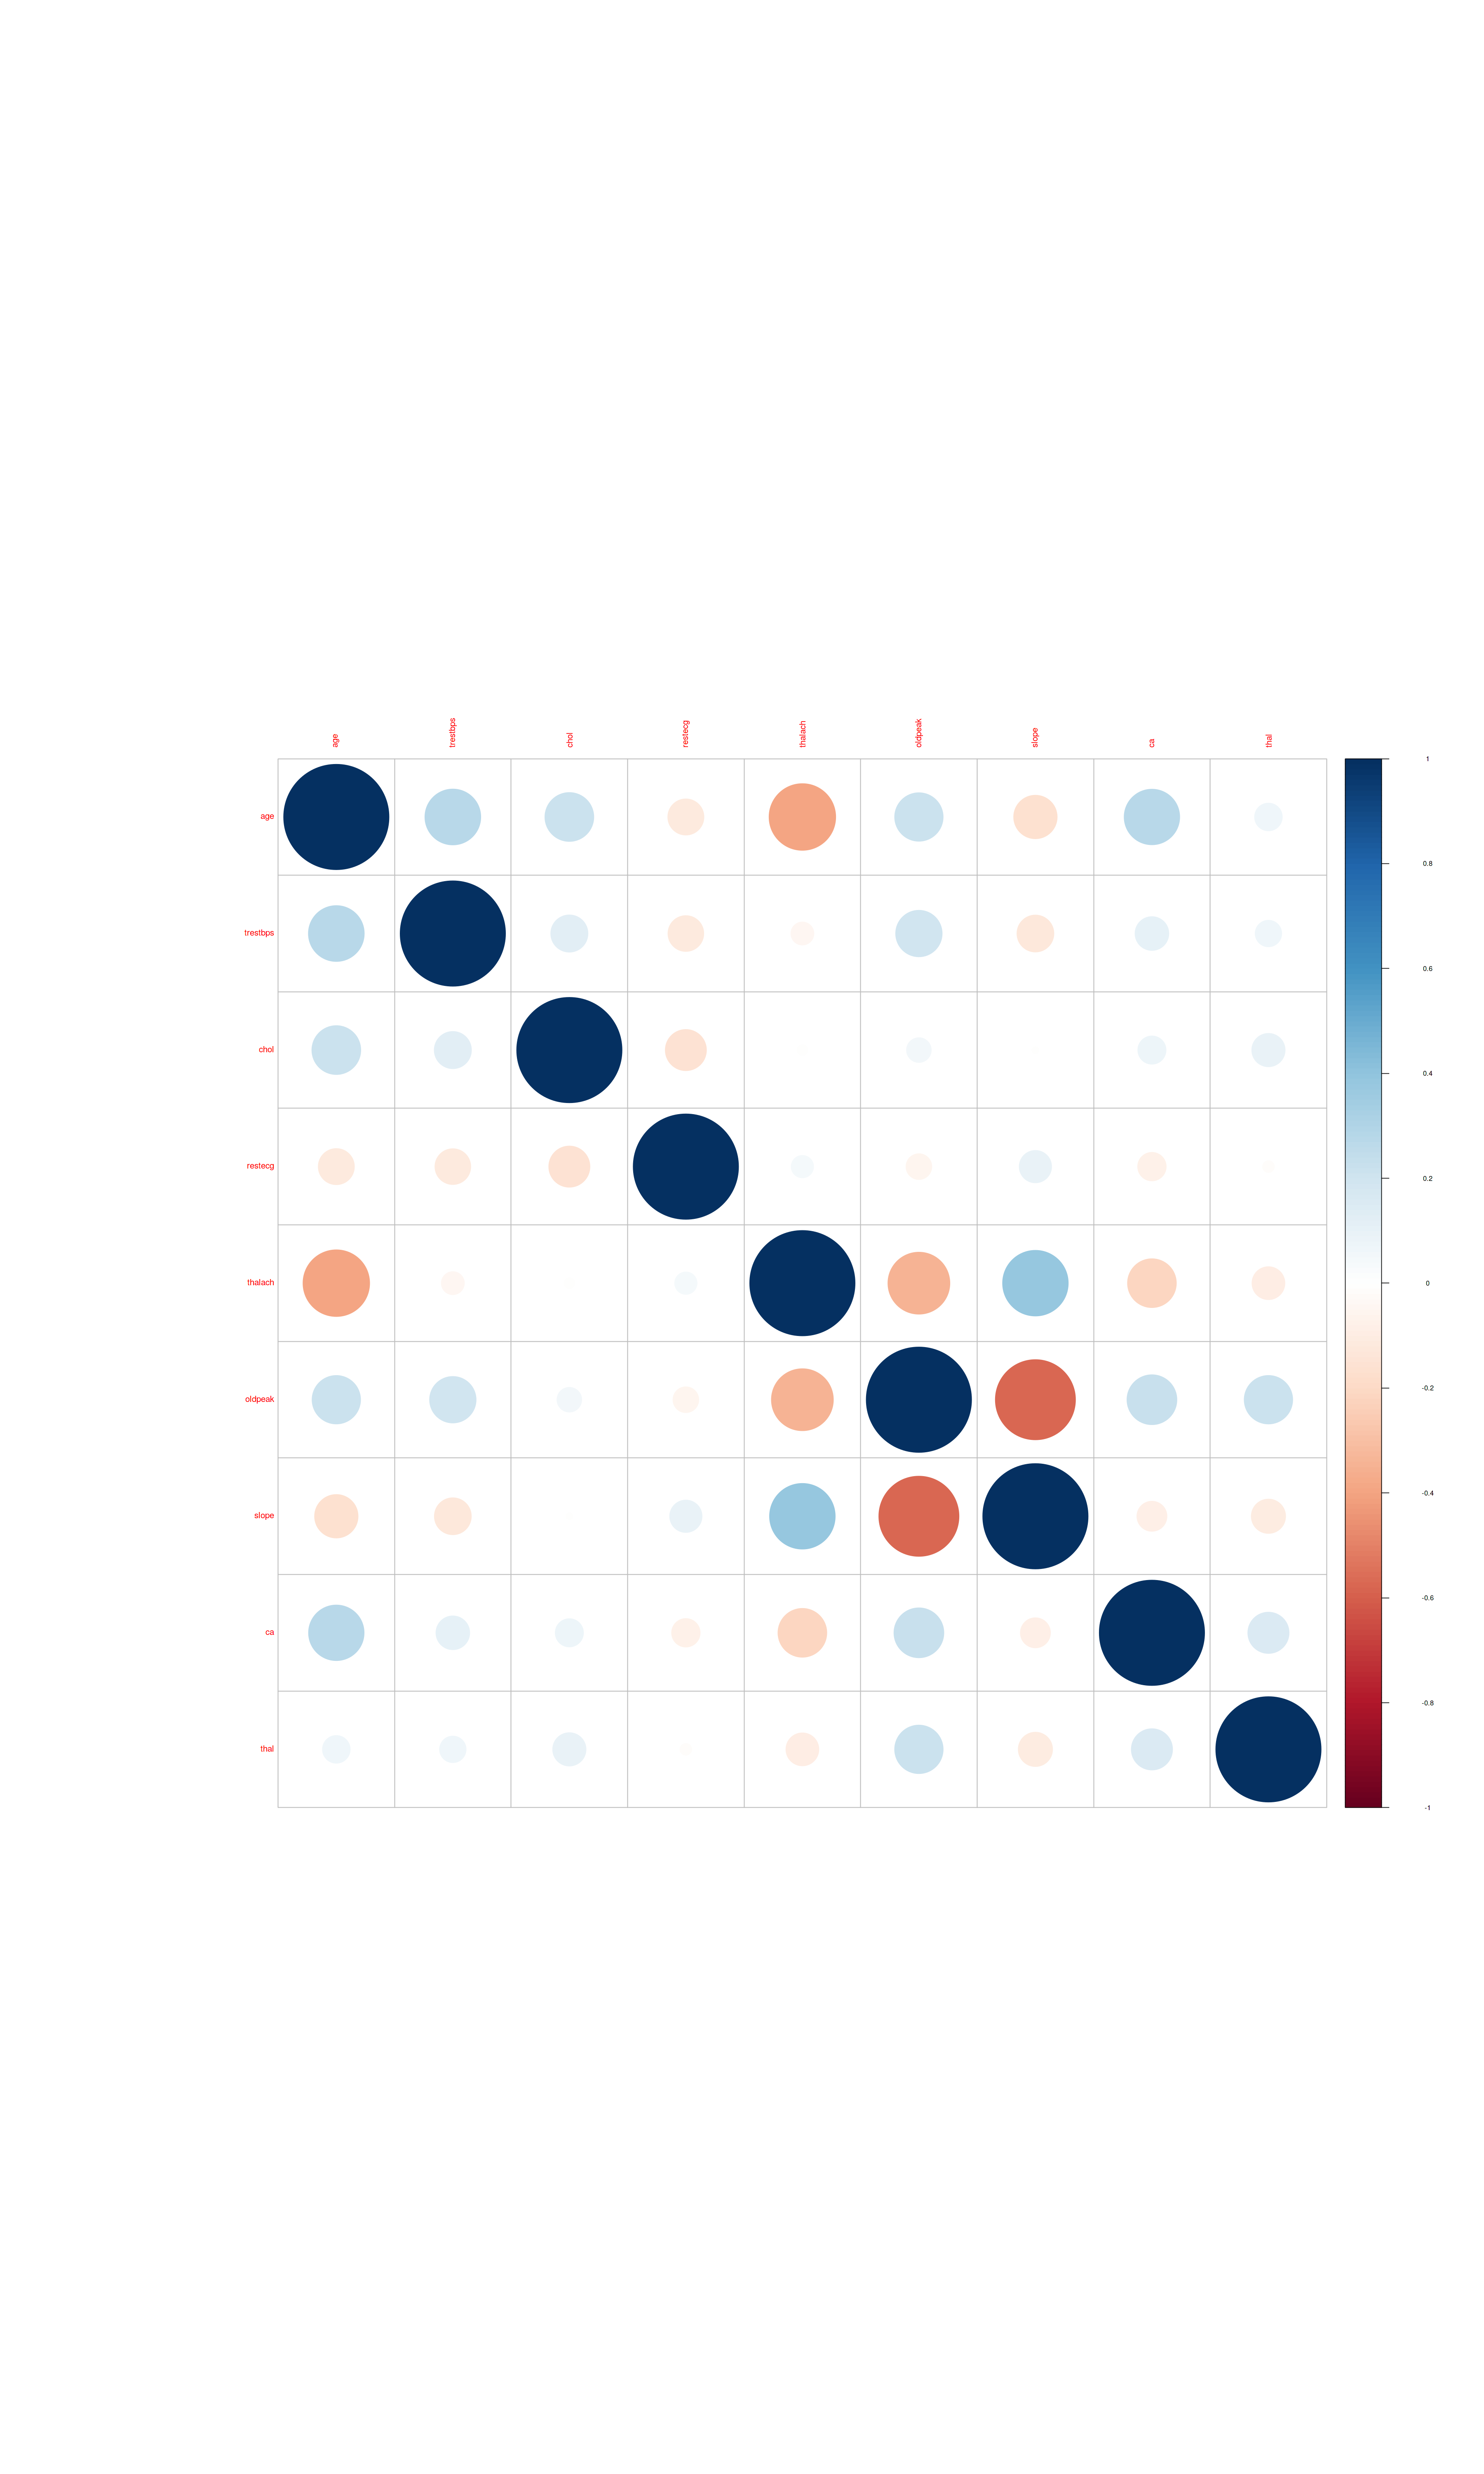

In [7]:
#Correlation Heat Plot
library(corrplot)
corrplot(cor(df[,-c(2,3,6,9,14)]))

# Train-Test Split

In [8]:
library(caTools)
set.seed(123)
index<-sample.split(df$target,SplitRatio = 0.8)
train<-subset(df,index ==TRUE)
test<-subset(df,index==FALSE)


# Decision Tree Model

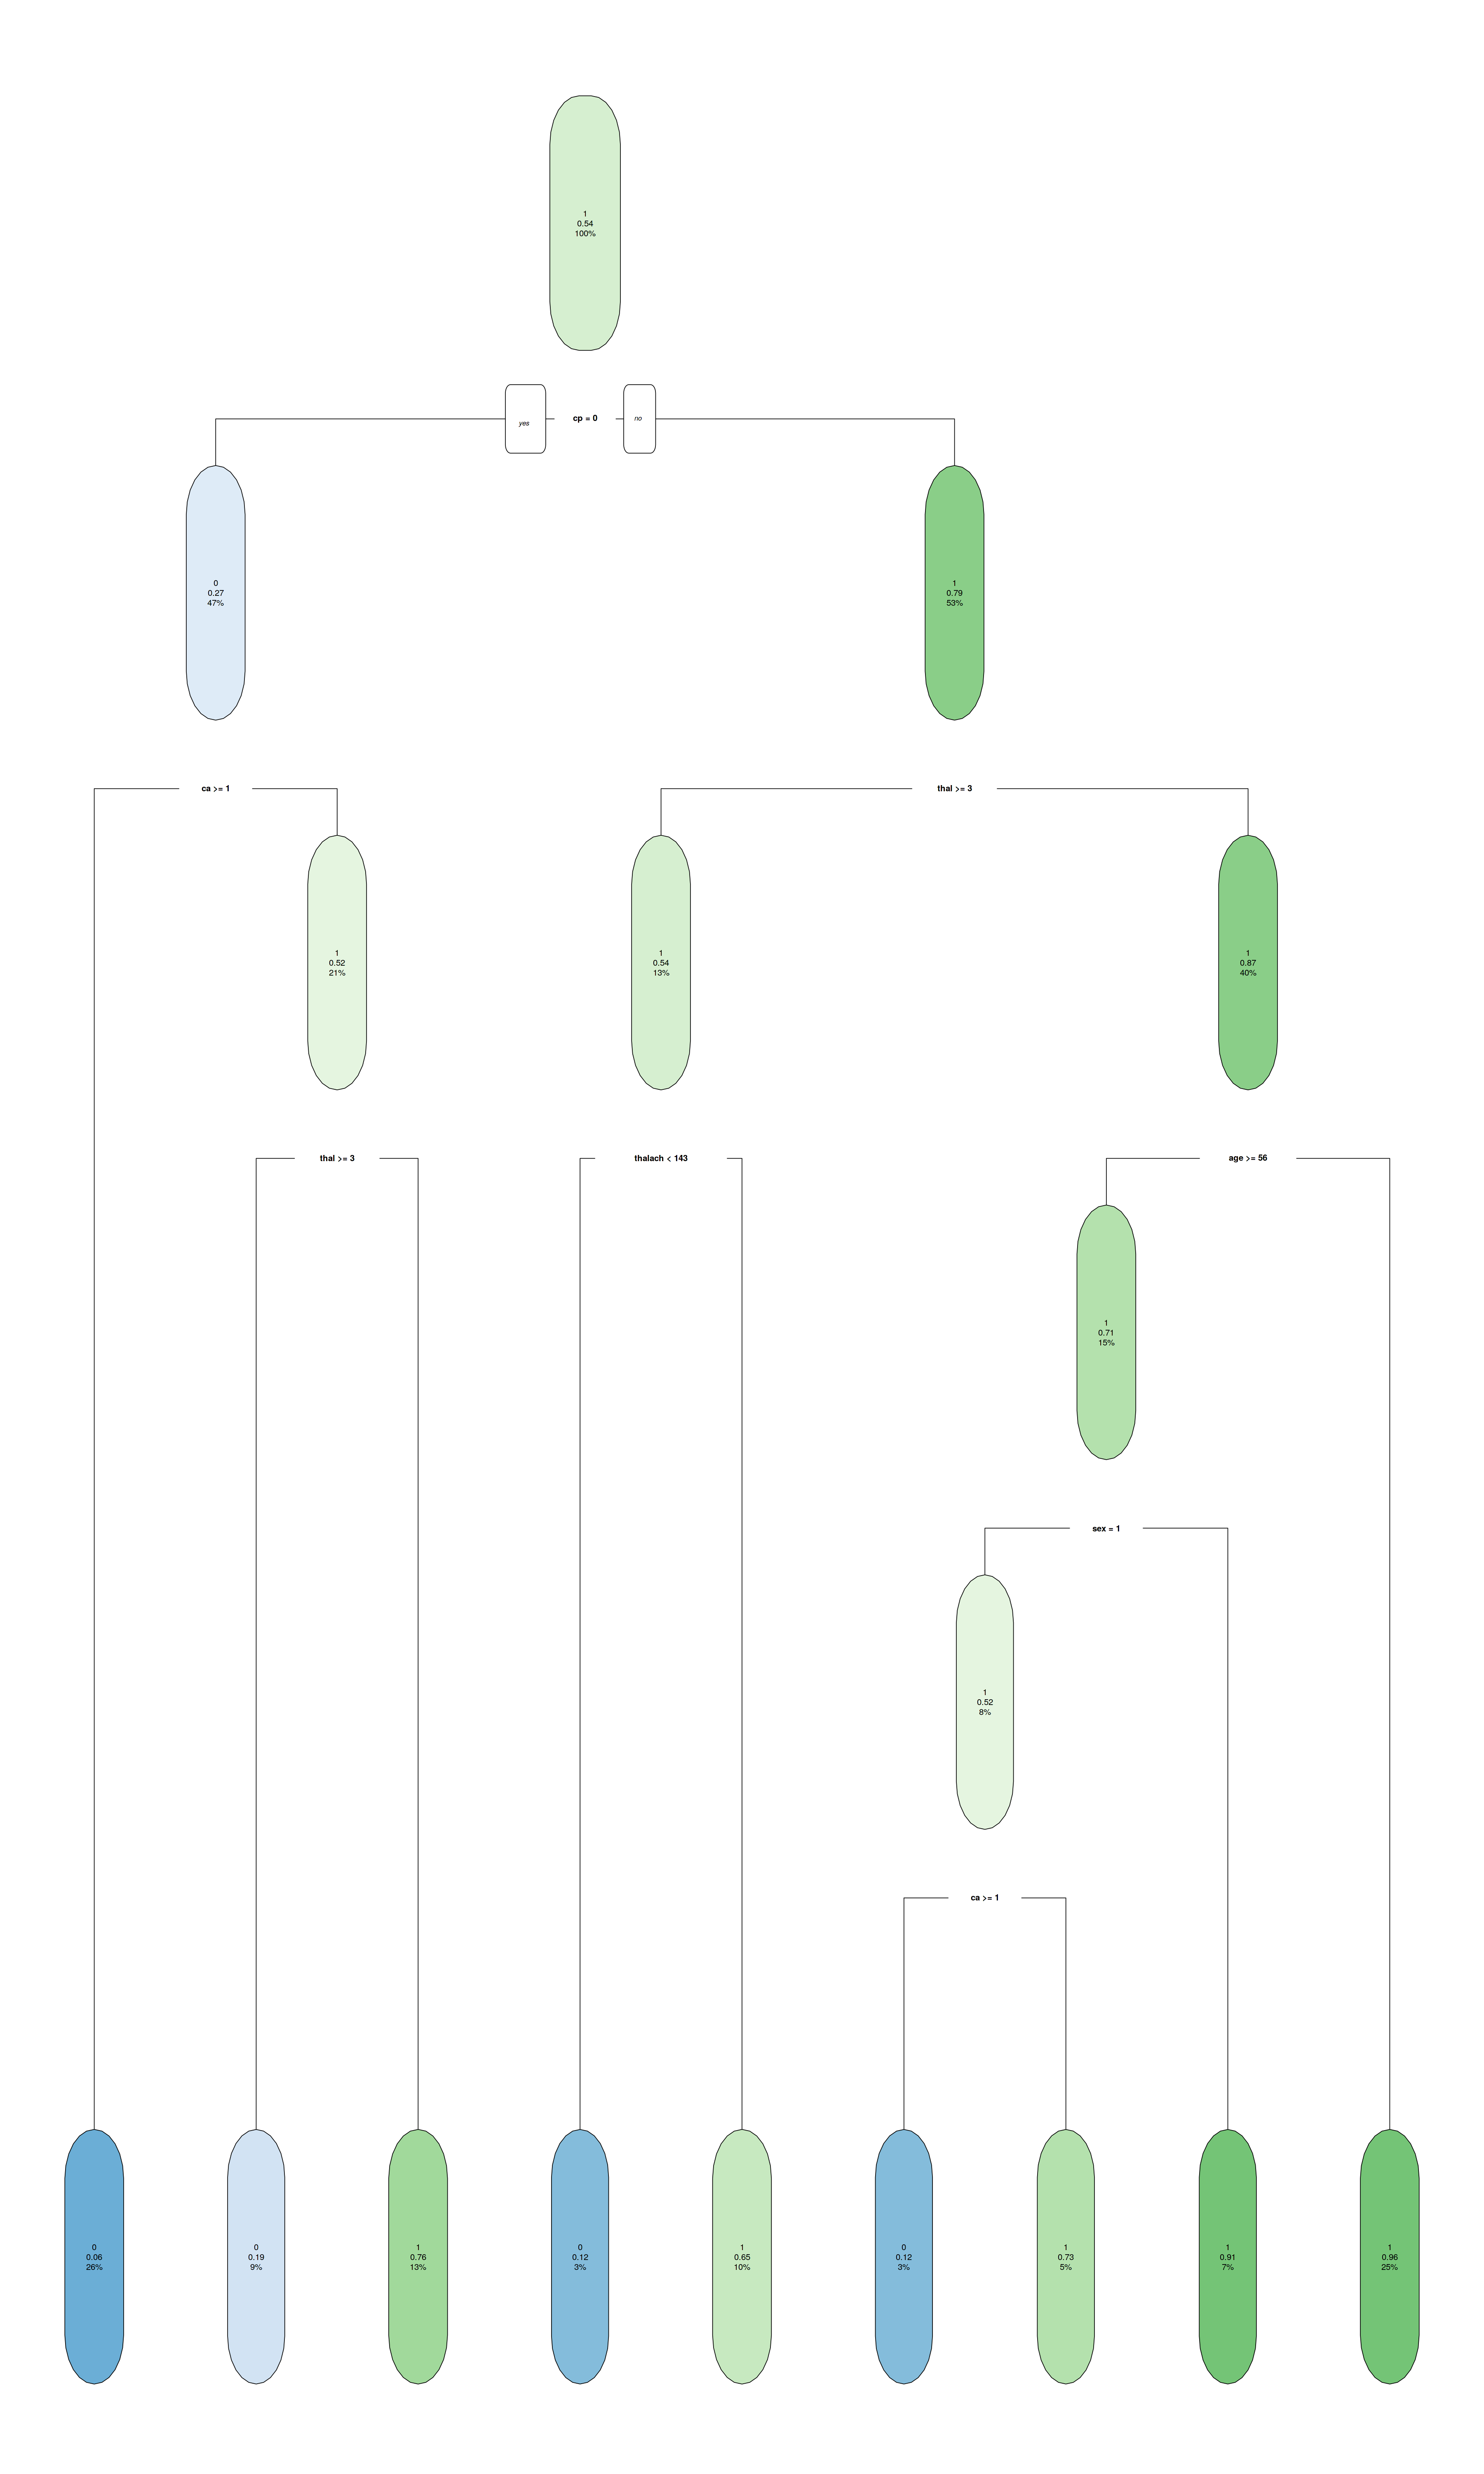

In [9]:
library(rpart)#for rpart decision tree
library(rpart.plot)#for visualising the tree
model.tree<-rpart(target~.,data = df)
rpart.plot(model.tree)

# Single Layer Neural Network Model

# weights:  86
initial  value 262.055523 
final  value 208.819028 
converged


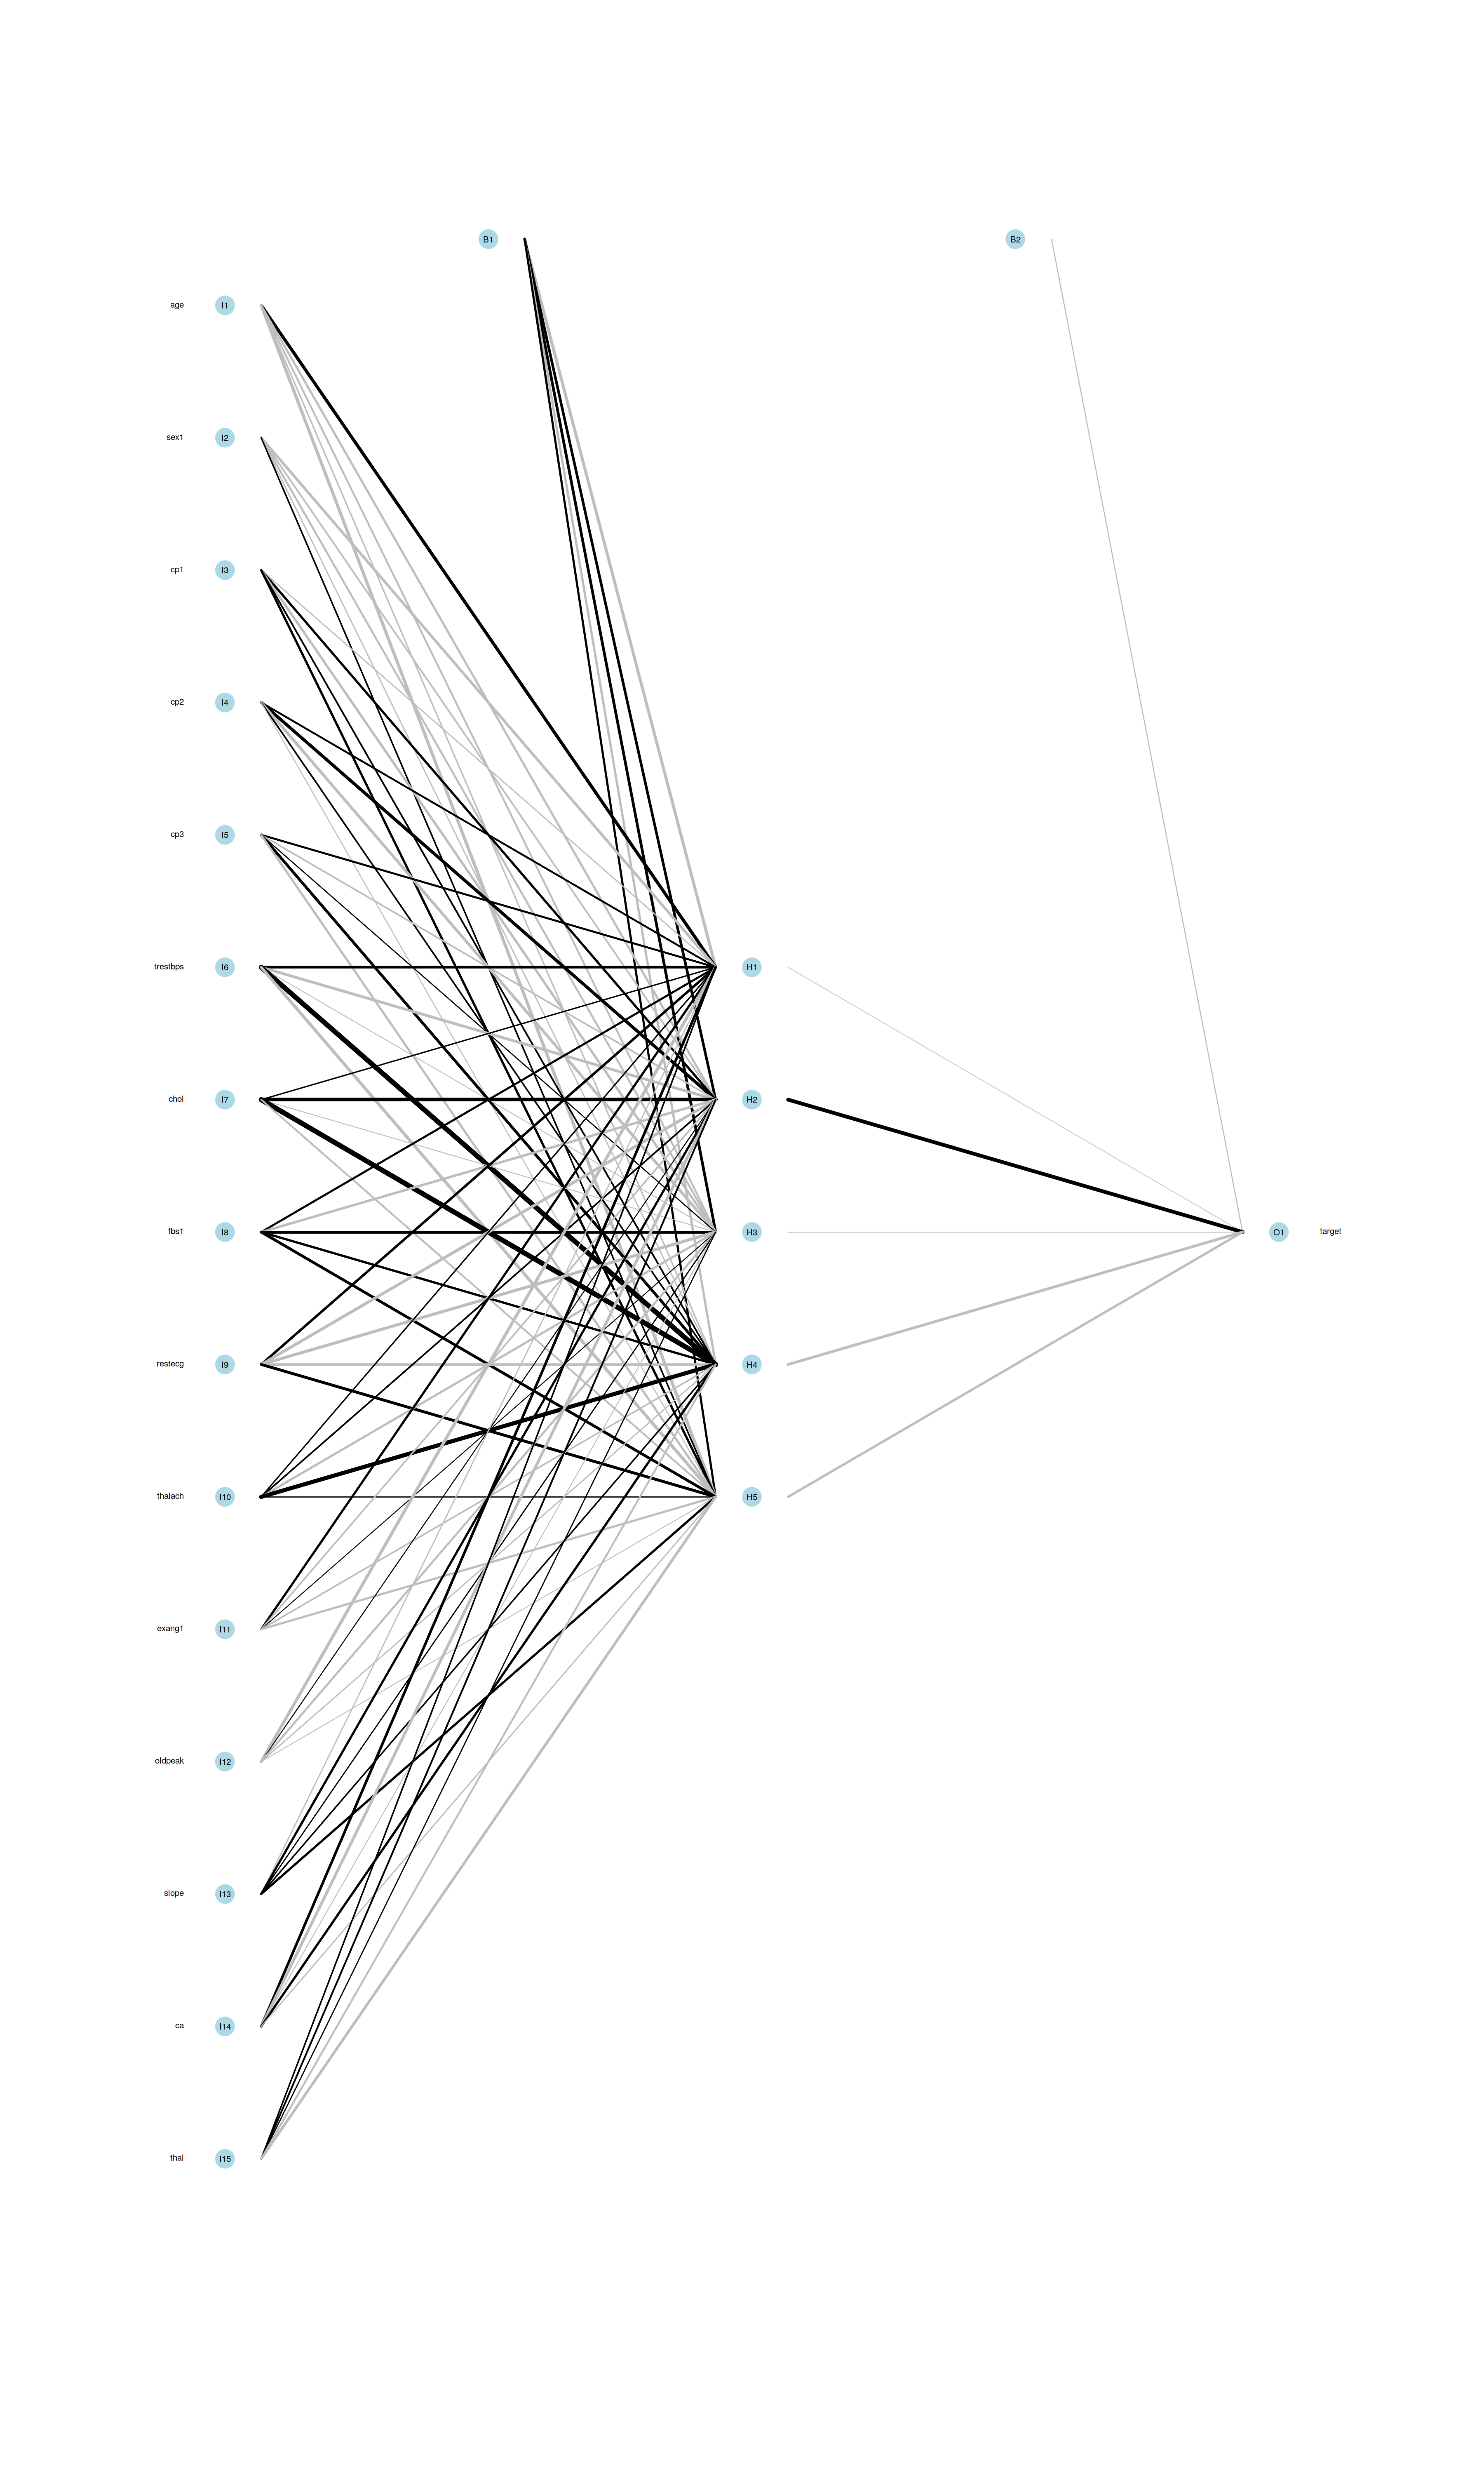

In [10]:
library(nnet)#for neural netwrok model
library(NeuralNetTools)#for neural network plot
model.nn<-nnet(target~.,data = df, size = 5 , maxit = 1000)
plotnet(model.nn)

# Model Comparison


In [11]:
library(caret)
print('Decision Tree Model Accuracy')
confusionMatrix(as.factor(predict(model.tree,newdata = test, type = 'class')),test$target)
print('Neural Network Accuracy')
confusionMatrix(as.factor(predict(model.nn,newdata = test, type = 'class')),test$target)


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




[1] "Decision Tree Model Accuracy"


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 21  4
         1  7 29
                                          
               Accuracy : 0.8197          
                 95% CI : (0.7002, 0.9064)
    No Information Rate : 0.541           
    P-Value [Acc > NIR] : 4.82e-06        
                                          
                  Kappa : 0.6339          
                                          
 Mcnemar's Test P-Value : 0.5465          
                                          
            Sensitivity : 0.7500          
            Specificity : 0.8788          
         Pos Pred Value : 0.8400          
         Neg Pred Value : 0.8056          
             Prevalence : 0.4590          
         Detection Rate : 0.3443          
   Detection Prevalence : 0.4098          
      Balanced Accuracy : 0.8144          
                                          
       'Positive' Class : 0               
                                    

[1] "Neural Network Accuracy"


Warning message in confusionMatrix.default(as.factor(predict(model.nn, newdata = test, :
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0  0  0
         1 28 33
                                          
               Accuracy : 0.541           
                 95% CI : (0.4085, 0.6694)
    No Information Rate : 0.541           
    P-Value [Acc > NIR] : 0.5524          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 3.352e-07       
                                          
            Sensitivity : 0.000           
            Specificity : 1.000           
         Pos Pred Value :   NaN           
         Neg Pred Value : 0.541           
             Prevalence : 0.459           
         Detection Rate : 0.000           
   Detection Prevalence : 0.000           
      Balanced Accuracy : 0.500           
                                          
       'Positive' Class : 0               
                                    